In [24]:
# -*- coding:utf-8 -*-
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
import time
import re
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import datetime

In [2]:
#Ï§ëÍ∞Ñ Ï†ÄÏû• Ï£ºÍ∏∞, ÌååÏùº Í≤ΩÎ°ú
save_when = 50
save_path = 'c:/cr/'
font_path_window="c:/Windows/Fonts/malgun.ttf"
driver_path = 'c:/cd/chromedriver'

In [3]:
browser = webdriver.Chrome(driver_path)
browser.implicitly_wait(3)

In [4]:
def searching_insta(browser):
    url = 'https://www.instagram.com/explore/tags/{}'.format(word)
    browser.get(url)

In [5]:
def click_1st(browser):
    browser.find_element_by_css_selector('a > div > div._si7dy').click()

In [6]:
def get_current_url(browser):
    article_url = browser.current_url
    return article_url

In [7]:
def get_author(browser):
    author = browser.find_element_by_css_selector('li._ezgzd > a').text
    return author

In [8]:
def get_content(browser):
    content = browser.find_element_by_css_selector('li._ezgzd > span').text
    return content

In [9]:
def get_reply(browser):
    more_reply = True
    while more_reply:
        try:
            browser.find_element_by_css_selector('a._m3m1c._1s3cd').click()
            time.sleep(1)
        except:
            more_reply = False
            break
    
    replies = browser.find_elements_by_css_selector('li._ezgzd')[1:]
    reply_result = []
    for reply in replies:
        reply_author = reply.find_element_by_css_selector('a').text
        reply_content = reply.find_element_by_css_selector('span').text
        reply_result.append([reply_author, reply_content])
    return reply_result

In [10]:
def get_content_type(browser):
    try:
        video_check = browser.find_element_by_css_selector('section._1w76c._nlmjy > div > span')
        if video_check.text[:2] == 'Ï°∞Ìöå':
            content_type = 'ÎèôÏòÅÏÉÅ'
            
        else:
            content_type = 'Ïù¥ÎØ∏ÏßÄ'
    
    except:
        content_type = 'Ïù¥ÎØ∏ÏßÄ'
        
    return content_type

In [11]:
def get_img_likes(browser):
    plays = 1
    
    try:      
        check = browser.find_element_by_css_selector('section._1w76c._nlmjy > div').text
                
        if check[-3:] == 'Ìï©ÎãàÎã§':
            likes = len(browser.find_elements_by_css_selector('section._1w76c._nlmjy > div > a'))
                        
        else:
            likes = int(check[4:-1].replace(',',''))
                                
        return likes, plays
                                                           
    except:
        likes = 0
        return likes, plays

In [12]:
def get_vid_likes(browser):
    check = browser.find_element_by_css_selector('section._1w76c._nlmjy > div > span > span')

    plays = check.text
           
    check.click()
        
    likes = browser.find_element_by_css_selector('section._1w76c._nlmjy > div > div > div._m10kk > span').text
        
    browser.find_element_by_css_selector('section._1w76c._nlmjy > div > div > div._7px37').click()
    
    plays = int(plays.replace(',',''))
    likes = int(likes.replace(',',''))
    
    return likes, plays

In [13]:
def get_likesandplays(browser):
    content_type = get_content_type(browser)
    if content_type == 'Ïù¥ÎØ∏ÏßÄ':
        likesandplays = get_img_likes(browser)
    
    elif content_type == 'ÎèôÏòÅÏÉÅ':
        likesandplays = get_vid_likes(browser)
    
    return likesandplays

In [14]:
def get_tags(browser):
    content = get_content(browser)
    tags = re.findall(r'#[^\s#,\\]+', content)
    return tags

In [15]:
def get_location(browser):
    try:
        location = browser.find_element_by_css_selector('div._j56ec > div._60iqg > a').text
    
    except NoSuchElementException:
        location = 'none'
    
    return location

In [16]:
def tag_result():
    f = open(txt_path, 'r', encoding = 'utf8')
    tags = f.read()
    f.close()
    
    tags = tags.split('\n')
    tag_count = Counter(tags)
    print(tag_count)

    %matplotlib inline
    
    wordcloud = WordCloud(font_path= font_path_window, background_color="white", 
                          max_words=100).generate_from_frequencies(tag_count) #font_step=5
    plt.figure(figsize=(20,15))
    plt.imshow(wordcloud)
    plt.axis('off')

In [36]:
def move_next(browser):
    browser.find_element_by_css_selector('div._23gmb > div > div > a._3a693.coreSpriteRightPaginationArrow').click()

In [18]:
#ÌÉúÍ∑∏ Ìä∏Î†åÎìú: Í≤åÏãúÎ¨ºÏùò ÌÉúÍ∑∏Îßå ÏàòÏßëÌïòÏó¨ ÌÉúÍ∑∏ ÏàúÏúÑ Î¶¨Ìè¨Ìä∏ - ÌÅ¥ÎùºÏö∞Îìú Ï∂úÎ†•, ÌååÏùºÎ°ú Ï†ÄÏû•.
def find_tagtrend(browser):
    tags = []    
    
    for i in range(num):                
        tags += get_tags(browser)

        index = int(i+1)
        print('{}Î≤àÏß∏ ÌÅ¨Î°§ÎßÅ Ï§ë'.format(index))

        if index % save_when == 0:
            f = open(txt_path, 'a+', encoding = 'utf8')
            f.write('\n'.join(tags))
            f.close()
            print('- Ï§ëÍ∞Ñ Í≤∞Í≥ºÎ•º Ï†ÄÏû•ÌñàÏäµÎãàÎã§ -')
            tags = []
        
        try:
            move_next(browser)
            time.sleep(2)
            
        except NoSuchElementException:
            f = open(txt_path, 'a+', encoding = 'utf8')
            f.write('\n'.join(tags))
            f.close()
            
            
    f = open(txt_path, 'a+', encoding = 'utf8')
    f.write('\n'.join(tags))
    f.close()

    print('''
    - ÏµúÏ¢Ö Í≤∞Í≥ºÎ•º Ï†ÄÏû•ÌñàÏäµÎãàÎã§ - 
    - Î™®Îì† ÌÅ¨Î°§ÎßÅÏùÑ ÎßàÏ≥§ÏäµÎãàÎã§ - 
    ''')
    
    tag_result()

In [19]:
#Ïù∏Í∏∞ Í≤åÏãúÎ¨º: Í≤åÏãúÎ¨ºÏùò Ï¢ãÏïÑÏöîÎ•º ÏàòÏßëÌïòÏó¨ Top10 Í≤åÏãúÎ¨ºÏùò  Ï¢ãÏïÑÏöî Ïà´Ïûê, Í≤åÏãúÍ∏Ä Ï†ÄÏûê, Î≥∏Î¨∏, Í≤åÏãúÍ∏Ä ÎßÅÌÅ¨ Î¶¨Ìè¨Ìä∏ - Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ï∂úÎ†•, ÌååÏùºÎ°ú Ï†ÄÏû•.
def find_top10(browser):
    best_likes = [[0, 0, '', '', ''], [0, 0, '', '', ''], [0, 0, '', '', ''], [0, 0, '', '', ''], [0, 0, '', '', ''], [0, 0, '', '', ''], [0, 0, '', '', ''], [0, 0, '', '', ''], [0, 0, '', '', ''], [0, 0, '', '', '']]
    
    for i in range(num):                     
        index = int(i+1)

        print('{}Î≤àÏß∏ ÌÅ¨Î°§ÎßÅ Ï§ë'.format(index))
        
        likes = get_likesandplays(browser)[0]
        plays = get_likesandplays(browser)[1]
        author = get_author(browser)
        article = get_content(browser)
        article_url = get_current_url(browser)
        
        result = [likes, plays, author, article, article_url]
        
        if result > best_likes[9]:
            best_likes.append(result)       
            
            best_likes.sort()
            best_likes.reverse()
            drop = best_likes.pop()
            
        if index % save_when == 0:
            rankings = pd.DataFrame(best_likes, columns=['Ï¢ãÏïÑÏöî', 'Ïû¨ÏÉùÏàò', 'ÏûëÏÑ±Ïûê', 'Î≥∏Î¨∏', 'url'])
            rankings.to_csv(csv_path)
            print('- Ï§ëÍ∞Ñ Í≤∞Í≥ºÎ•º Ï†ÄÏû•ÌñàÏäµÎãàÎã§ -')
        
        try:
            move_next(browser)
            time.sleep(2)
            
        except NoSuchElementException:
            rankings = pd.DataFrame(best_likes, columns=['Ï¢ãÏïÑÏöî', 'Ïû¨ÏÉùÏàò', 'ÏûëÏÑ±Ïûê', 'Î≥∏Î¨∏', 'url'])
            rankings.to_csv(csv_path)
                    
    rankings = pd.DataFrame(best_likes, columns=['Ï¢ãÏïÑÏöî', 'Ïû¨ÏÉùÏàò', 'ÏûëÏÑ±Ïûê', 'Î≥∏Î¨∏', 'url'])
    rankings.to_csv(csv_path)
    
    print('''
    - ÏµúÏ¢Ö Í≤∞Í≥ºÎ•º Ï†ÄÏû•ÌñàÏäµÎãàÎã§ - 
    - Î™®Îì† ÌÅ¨Î°§ÎßÅÏùÑ ÎßàÏ≥§ÏäµÎãàÎã§ - 
    ''')
        
    print(rankings)

In [20]:
def find_fullreport(browser):
    result = []
    results = []
    report = pd.DataFrame(columns = ['Ï¢ãÏïÑÏöî', 'Ïû¨ÏÉùÏàò', 'ÏûëÏÑ±Ïûê', 'Ïû•ÏÜå', 'Î≥∏Î¨∏', 'url'])
    
    for i in range(num):                     
        index = int(i+1)
        print('{}Î≤àÏß∏ ÌÅ¨Î°§ÎßÅ Ï§ë'.format(index))
        
        likes = get_likesandplays(browser)[0]
        plays = get_likesandplays(browser)[1]
        author = get_author(browser)
        location = get_location(browser)
        article = get_content(browser)
        article_url = get_current_url(browser)
        
        result = [likes, plays, author, location, article, article_url]
        results.append(result)   
        
        if index % save_when == 0:
            temp_report = pd.DataFrame(results, columns = ['Ï¢ãÏïÑÏöî', 'Ïû¨ÏÉùÏàò', 'ÏûëÏÑ±Ïûê', 'Ïû•ÏÜå', 'Î≥∏Î¨∏', 'url'])
            report = pd.concat([report, temp_report])
            report.to_csv(csv_path)
            results = []
            print('- Ï§ëÍ∞Ñ Í≤∞Í≥ºÎ•º Ï†ÄÏû•ÌñàÏäµÎãàÎã§ -')
        
        try:
            move_next(browser)
            time.sleep(2)
        
        except NoSuchElementException:
            temp_report = pd.DataFrame(results, columns = ['Ï¢ãÏïÑÏöî', 'Ïû¨ÏÉùÏàò', 'ÏûëÏÑ±Ïûê', 'Ïû•ÏÜå', 'Î≥∏Î¨∏', 'url'])
            report = pd.concat([report, temp_report])
            report.to_csv(csv_path)    
        
    temp_report = pd.DataFrame(results, columns = ['Ï¢ãÏïÑÏöî', 'Ïû¨ÏÉùÏàò', 'ÏûëÏÑ±Ïûê', 'Ïû•ÏÜå', 'Î≥∏Î¨∏', 'url'])
    report = pd.concat([report, temp_report])
    report.to_csv(csv_path)

    print('''
    - ÏµúÏ¢Ö Í≤∞Í≥ºÎ•º Ï†ÄÏû•ÌñàÏäµÎãàÎã§ -
    - Î™®Îì† ÌÅ¨Î°§ÎßÅÏùÑ ÎßàÏ≥§ÏäµÎãàÎã§ - 
    ''')

In [21]:
word = input('Ï∞æÍ≥† Ïã∂ÏùÄ ÌÇ§ÏõåÎìúÎ•º ÏûÖÎ†•ÌïòÏÑ∏Ïöî: ')
searching_insta(browser)

now = datetime.now()
start_time = now.strftime('%Y%m%d_%H:%M')

txt_path = save_path + '{}_{}.txt'.format(word, start_time)
csv_path = save_path + '{}_{}.csv'.format(word, start_time)

num = int(input('Î™áÍ±¥Ïùò Ìè¨Ïä§ÌåÖÏùÑ Ï∞æÏúºÏãúÍ≤†ÏäµÎãàÍπå?: '))
click_1st(browser)
browser.implicitly_wait(3)

#Î¶¨Ìè¨Ìä∏ Î∞©Î≤ï
##1. ÌÉúÍ∑∏ Ìä∏Î†åÎìú: Í≤åÏãúÎ¨ºÏùò ÌÉúÍ∑∏Îßå ÏàòÏßëÌïòÏó¨ ÌÉúÍ∑∏ ÏàúÏúÑ Î¶¨Ìè¨Ìä∏ - ÌÅ¥ÎùºÏö∞Îìú Ï∂úÎ†•, ÌååÏùºÎ°ú Ï†ÄÏû•.
##2. Ïù∏Í∏∞ Í≤åÏãúÎ¨º: Í≤åÏãúÎ¨ºÏùò Ï¢ãÏïÑÏöîÎ•º ÏàòÏßëÌïòÏó¨ Top10 Í≤åÏãúÎ¨ºÏùò  Ï¢ãÏïÑÏöî Ïà´Ïûê, Í≤åÏãúÍ∏Ä Ï†ÄÏûê, Î≥∏Î¨∏, Í≤åÏãúÍ∏Ä ÎßÅÌÅ¨ Î¶¨Ìè¨Ìä∏ - Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ï∂úÎ†•, ÌååÏùºÎ°ú Ï†ÄÏû•.
##3. ÌíÄ Î¶¨Ìè¨Ìä∏: Ï¢ãÏïÑÏöî Ïà´Ïûê, Í≤åÏãúÍ∏Ä Ï†ÄÏûê, Ïû•ÏÜå, Î≥∏Î¨∏, ÎåìÍ∏Ä, ÎßÅÌÅ¨ Î¶¨Ìè¨Ìä∏ -  ÌååÏùºÎ°ú Ï†ÄÏû•.

method = int(input('''
ÏõêÌïòÏãúÎäî Í≤ÄÏÉâ Î∞©Î≤ïÏùÑ Ïà´ÏûêÎ°ú ÏûÖÎ†•ÌïòÏÑ∏Ïöî.
1. ÌÉúÍ∑∏ Ìä∏Î†åÎìú
2. Ïù∏Í∏∞ Í≤åÏãúÎ¨º
3. ÌíÄ Î¶¨Ìè¨Ìä∏
'''))

if method == 1: 
    print('ÌÉúÍ∑∏ Ìä∏Î†åÎìú')
    find_tagtrend(browser)

elif method == 2:
    print('Ïù∏Í∏∞ Í≤åÏãúÎ¨º')
    find_top10(browser)
    
elif method == 3:
    print('ÌíÄ Î¶¨Ìè¨Ìä∏')
    find_fullreport(browser)
    
else:
    print('ÏûòÎ™ª ÏûÖÎ†•ÌïòÏÖ®ÏäµÎãàÎã§.')

Ï∞æÍ≥† Ïã∂ÏùÄ ÌÇ§ÏõåÎìúÎ•º ÏûÖÎ†•ÌïòÏÑ∏Ïöî: Ïä¨Î°úÏö∞Ìé´Ìë∏Îìú
Î™áÍ±¥Ïùò Ìè¨Ïä§ÌåÖÏùÑ Ï∞æÏúºÏãúÍ≤†ÏäµÎãàÍπå?: 400

ÏõêÌïòÏãúÎäî Í≤ÄÏÉâ Î∞©Î≤ïÏùÑ Ïà´ÏûêÎ°ú ÏûÖÎ†•ÌïòÏÑ∏Ïöî.
1. ÌÉúÍ∑∏ Ìä∏Î†åÎìú
2. Ïù∏Í∏∞ Í≤åÏãúÎ¨º
3. ÌíÄ Î¶¨Ìè¨Ìä∏
1
ÌÉúÍ∑∏ Ìä∏Î†åÎìú
1Î≤àÏß∏ ÌÅ¨Î°§ÎßÅ Ï§ë
2Î≤àÏß∏ ÌÅ¨Î°§ÎßÅ Ï§ë
3Î≤àÏß∏ ÌÅ¨Î°§ÎßÅ Ï§ë
4Î≤àÏß∏ ÌÅ¨Î°§ÎßÅ Ï§ë
5Î≤àÏß∏ ÌÅ¨Î°§ÎßÅ Ï§ë
6Î≤àÏß∏ ÌÅ¨Î°§ÎßÅ Ï§ë
7Î≤àÏß∏ ÌÅ¨Î°§ÎßÅ Ï§ë
8Î≤àÏß∏ ÌÅ¨Î°§ÎßÅ Ï§ë
9Î≤àÏß∏ ÌÅ¨Î°§ÎßÅ Ï§ë
10Î≤àÏß∏ ÌÅ¨Î°§ÎßÅ Ï§ë
11Î≤àÏß∏ ÌÅ¨Î°§ÎßÅ Ï§ë
12Î≤àÏß∏ ÌÅ¨Î°§ÎßÅ Ï§ë
13Î≤àÏß∏ ÌÅ¨Î°§ÎßÅ Ï§ë
14Î≤àÏß∏ ÌÅ¨Î°§ÎßÅ Ï§ë
15Î≤àÏß∏ ÌÅ¨Î°§ÎßÅ Ï§ë
16Î≤àÏß∏ ÌÅ¨Î°§ÎßÅ Ï§ë
17Î≤àÏß∏ ÌÅ¨Î°§ÎßÅ Ï§ë
18Î≤àÏß∏ ÌÅ¨Î°§ÎßÅ Ï§ë
19Î≤àÏß∏ ÌÅ¨Î°§ÎßÅ Ï§ë
20Î≤àÏß∏ ÌÅ¨Î°§ÎßÅ Ï§ë
21Î≤àÏß∏ ÌÅ¨Î°§ÎßÅ Ï§ë
22Î≤àÏß∏ ÌÅ¨Î°§ÎßÅ Ï§ë
23Î≤àÏß∏ ÌÅ¨Î°§ÎßÅ Ï§ë
24Î≤àÏß∏ ÌÅ¨Î°§ÎßÅ Ï§ë
25Î≤àÏß∏ ÌÅ¨Î°§ÎßÅ Ï§ë
26Î≤àÏß∏ ÌÅ¨Î°§ÎßÅ Ï§ë
27Î≤àÏß∏ ÌÅ¨Î°§ÎßÅ Ï§ë
28Î≤àÏß∏ ÌÅ¨Î°§ÎßÅ Ï§ë
29Î≤àÏß∏ ÌÅ¨Î°§ÎßÅ Ï§ë
30Î≤àÏß∏ ÌÅ¨Î°§ÎßÅ Ï§ë
31Î≤àÏß∏ ÌÅ¨Î°§ÎßÅ Ï§ë
32Î≤àÏß∏ ÌÅ¨Î°§ÎßÅ Ï§ë
33Î≤àÏß∏ ÌÅ¨Î°§ÎßÅ Ï§ë
34

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"div._23gmb > div > div > a._3a693.coreSpriteRightPaginationArrow"}
  (Session info: chrome=63.0.3239.132)
  (Driver info: chromedriver=2.35.528161 (5b82f2d2aae0ca24b877009200ced9065a772e73),platform=Windows NT 6.1.7601 SP1 x86_64)


In [34]:
print(start_time)

20180205_16:29


Counter({'#ÎèÑÍ∑∏ÏÖ∞ÌîÑÎØ∏ÏöîÏÖ∞ÌîÑ': 281, '#Í∞ïÏïÑÏßÄÏûêÏó∞Ïãù': 214, '#ÎèÑÍ∑∏ÏÖ∞ÌîÑ': 213, '#Î¨¥Î≥ëÏû•Ïàò': 202, '#Ïä¨Î°úÏö∞Ìé´Ìë∏Îìú': 200, '#ÎØ∏ÏöîÏÖ∞ÌîÑ': 196, '#Ïä§Î¨¥ÏÇ¥ÍπåÏßÄÎÇ¥Í≥ÅÏóê': 196, '#Îß§ÎãàÏïÑÌé´Ìë∏Îìú': 196, '#Í∞ïÏïÑÏßÄÏàòÏ†úÍ∞ÑÏãù': 196, '#ÏûòÏßÄÏùÄÎ∞•_ÏÑ†': 147, '#Í≥†ÏñëÏù¥ÏûêÏó∞Ïãù': 105, '#Í∞ïÏïÑÏßÄÏàòÏ†úÏÇ¨Î£å': 98, '#Í≥†ÏñëÏù¥ÏàòÏ†úÍ∞ÑÏãù': 97, '#ÏÇ¨Î£åÎßêÍ≥†_Î∞•': 95, '#Í∏àÏ™ΩÍ∞ôÏùÄÌïúÎÅº_ÏÑ†': 92, '#Repost': 82, '#Î∞òÍ±¥Ï°∞ÏûêÏó∞Ïãù': 66, '#Ìé†Î¶øÌòïÏûêÏó∞Ïãù': 66, '#ÏïÑÌä∏Ïò§Î∏åÏä§ÌååÏù¥Ïä§': 65, '#Í∞úÎÖêÏûàÎäîÏûêÏó∞Ïãù': 45, '#Ï≤¥ÌóòÎã®Î™®Ïßë': 37, '#Ïò§Í∞ÄÎãâÏù¥ÏßÄÎ≤†ÏßÄ': 33, '#AOS': 30, '#ÏÑ†_Ï≤¥ÌóòÎã®Î™®Ïßë': 26, '#Ìé´Ìë∏ÎìúÏõêÎç∞Ïù¥ÌÅ¥ÎûòÏä§': 25, '#ÏÑ†': 24, '#ÏûêÏó∞ÏãùÏø†ÌÇπÌÅ¥ÎûòÏä§': 23, '#Î∞òÎ†§ÎèôÎ¨ºÌó¨Ïä§ÏºÄÏñ¥ÏïÑÏπ¥Îç∞ÎØ∏': 21, '#Ìé´Ìë∏ÎìúÌÅ¥ÎûòÏä§': 21, '#ÏïÑÏù¥Ïä§Î∞ÄÌÅ¨Ï†§Î¶¨': 17, '#Ïù¥ÏßÄÎ≤†ÏßÄÏ≤¥ÌóòÎã®': 16, '#Í±¥Ï°∞ÏïºÏ±ÑÌì®Î†à': 14, '#ByRepost': 14, '#Regrann': 13, '#ÏÇºÎ≥µÏÑ∏Ìä∏2016': 11, '#Í∞ïÏïÑÏßÄÎ≥¥ÏñëÏãù': 11, '#Í∞ïÏïÑÏßÄÏïÑÏù¥Ïä§Ì

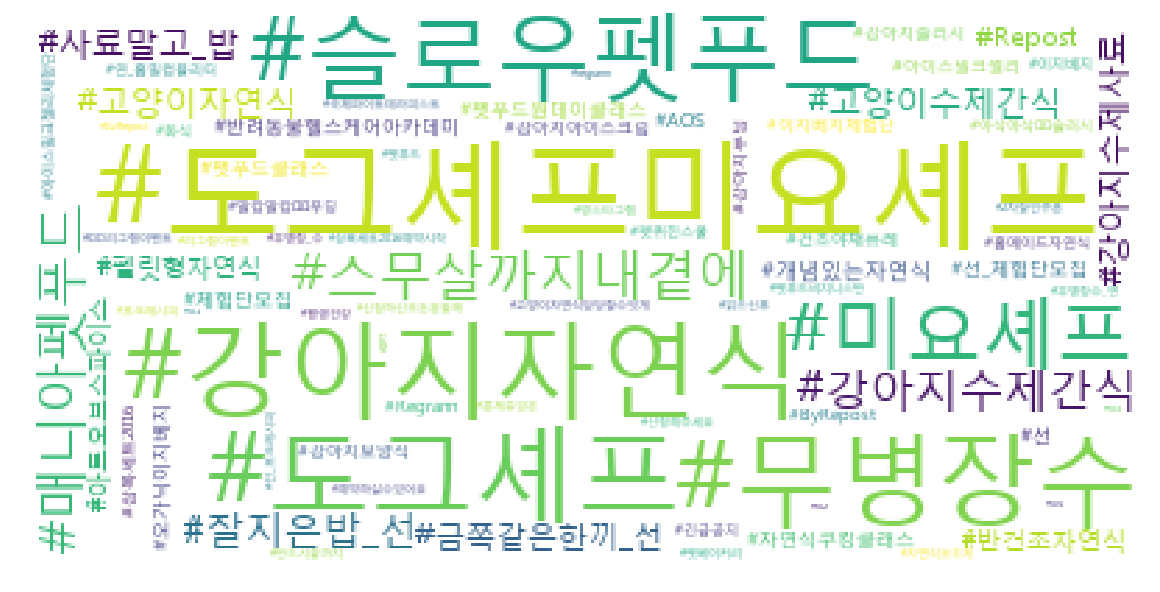

In [22]:
tag_result()